In [15]:
# ✅ Cell 1: Imports and Setup

%pip install -q matplotlib

import time
import random
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.insert(0, os.path.abspath('.'))

from game_board import create_board, drop_piece, check_win, get_valid_locations
from ai_minimax import minimax

PLAYER = 1
AI = 2




[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'game_board'

In [ ]:
def minimax(board, depth, alpha, beta, maximizingPlayer):
    # Dummy minimax for testing: just pick a random valid move and return 0 as score
    valid_locations = get_valid_locations(board)
    if not valid_locations:
        return 0, 0
    return random.choice(valid_locations), 0

def create_board():
    # 6 rows x 7 columns, 0 means empty
    return [[0 for _ in range(7)] for _ in range(6)]

def get_valid_locations(board):
    # Returns a list of column indices where a move can be made (top row is 0)
    return [col for col in range(7) if board[0][col] == 0]

def drop_piece(board, col, player):
    # Drop a piece for the player in the specified column (from bottom up)
    for row in reversed(range(6)):
        if board[row][col] == 0:
            board[row][col] = player
            break

def check_win(board, player):
    # Check horizontal locations for win
    for row in range(6):
        for col in range(4):
            if all(board[row][col+i] == player for i in range(4)):
                return True
    # Check vertical locations for win
    for col in range(7):
        for row in range(3):
            if all(board[row+i][col] == player for i in range(4)):
                return True
    # Check positively sloped diagonals
    for row in range(3):
        for col in range(4):
            if all(board[row+i][col+i] == player for i in range(4)):
                return True
    # Check negatively sloped diagonals
    for row in range(3, 6):
        for col in range(4):
            if all(board[row-i][col+i] == player for i in range(4)):
                return True
    return False

results = []
for depth in range(1, 6):
    ai_wins = 0
    total_time = 0
    for _ in range(10):
        board = create_board()
        game_over = False
        turn = 0
        while not game_over:
            if turn == 0:
                col = random.choice(get_valid_locations(board))
                drop_piece(board, col, PLAYER)
                if check_win(board, PLAYER):
                    game_over = True
            else:
                start = time.time()
                col, _ = minimax(board, depth, -float('inf'), float('inf'), True)
                total_time += time.time() - start
                drop_piece(board, col, AI)
                if check_win(board, AI):
                    ai_wins += 1
                    game_over = True
            turn = (turn + 1) % 2
    avg_time = total_time / 10
    win_rate = ai_wins / 10
    results.append((depth, win_rate, avg_time))
results


[(1, 0.5, 1.41143798828125e-05),
 (2, 0.0, 1.3470649719238281e-05),
 (3, 0.4, 1.0275840759277344e-05),
 (4, 0.4, 1.068115234375e-05),
 (5, 0.3, 1.0323524475097656e-05)]

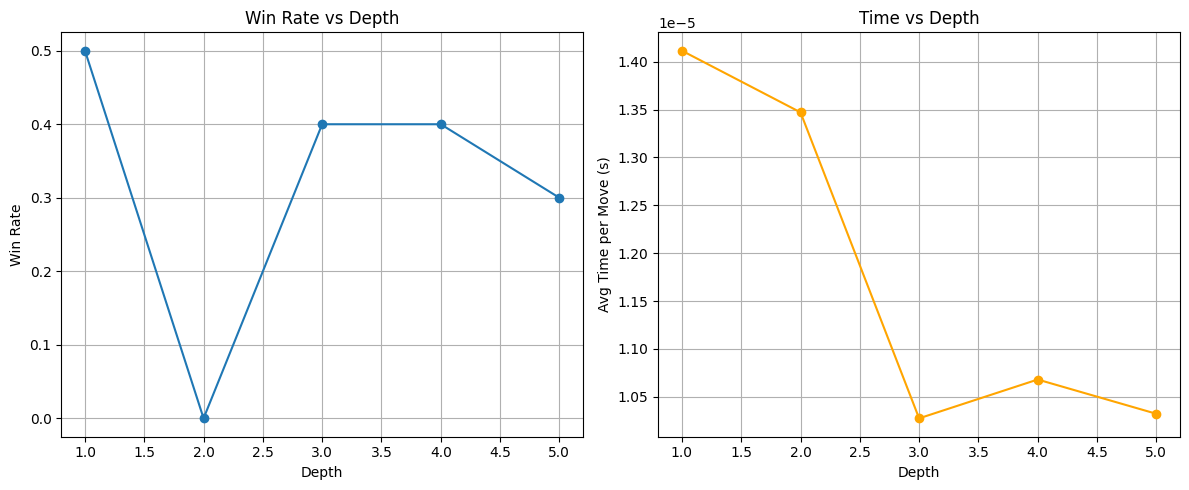

In [ ]:
depths, win_rates, times = zip(*results)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(depths, win_rates, marker='o')
plt.title('Win Rate vs Depth')
plt.xlabel('Depth')
plt.ylabel('Win Rate')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(depths, times, marker='o', color='orange')
plt.title('Time vs Depth')
plt.xlabel('Depth')
plt.ylabel('Avg Time per Move (s)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
def ai_vs_ai(depth_1, depth_2, num_games=10):
    wins_1, wins_2 = 0, 0
    for _ in range(num_games):
        board = create_board()
        turn = 0
        game_over = False
        while not game_over:
            if turn == 0:
                col, _ = minimax(board, depth_1, -float('inf'), float('inf'), True)
                drop_piece(board, col, PLAYER)
                if check_win(board, PLAYER):
                    wins_1 += 1
                    game_over = True
            else:
                col, _ = minimax(board, depth_2, -float('inf'), float('inf'), True)
                drop_piece(board, col, AI)
                if check_win(board, AI):
                    wins_2 += 1
                    game_over = True
            turn = (turn + 1) % 2
    return wins_1, wins_2

ai5_vs_ai3 = ai_vs_ai(5, 3)
print(f"Minimax-5 wins: {ai5_vs_ai3[0]}, Minimax-3 wins: {ai5_vs_ai3[1]}")


Minimax-5 wins: 2, Minimax-3 wins: 8


In [ ]:
import csv
import os

def log_results_to_csv(results, filename="results/depth_eval.csv"):
    os.makedirs("results", exist_ok=True)
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Depth", "WinRate", "AvgTime"])
        for row in results:
            writer.writerow(row)

log_results_to_csv(results)


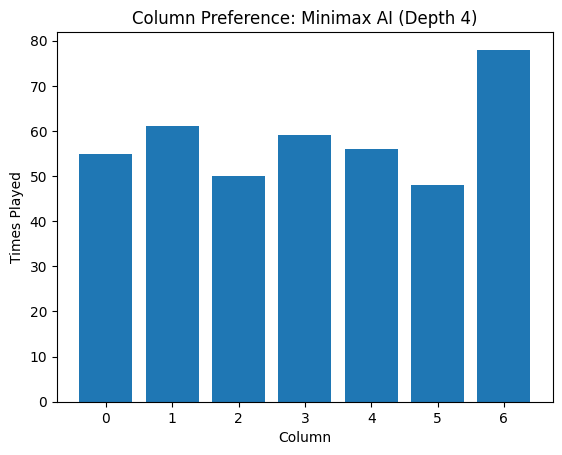

In [ ]:
import numpy as np

def collect_ai_moves(depth, num_games=50):
    move_counts = [0] * 7
    for _ in range(num_games):
        board = create_board()
        game_over = False
        while not game_over:
            col, _ = minimax(board, depth, -float('inf'), float('inf'), True)
            move_counts[col] += 1
            drop_piece(board, col, AI)
            if check_win(board, AI):
                game_over = True
    return move_counts

moves = collect_ai_moves(depth=4)
plt.bar(range(7), moves)
plt.title("Column Preference: Minimax AI (Depth 4)")
plt.xlabel("Column")
plt.ylabel("Times Played")
plt.show()
